In [2]:
from pyspark import SparkContext, SparkConf

TypeError: namedtuple() missing 3 required keyword-only arguments: 'verbose', 'rename', and 'module'

In [1]:
import os
import pandas as pd
import json
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import csv
%matplotlib inline 
from langdetect import detect, detect_langs
import unicodedata
import re


def has_letters(s):
    return any([unicodedata.category(c) in ['Ll','Lu','Lo'] for c in s])

In [2]:
with open("/dlabdata1/odor/twitter-swisscom/sample.tsv", 'r') as f:
    read_data = f.read()

In [3]:
read_data1=read_data.replace("\\\\\n"," \n").replace("\\\n"," ").replace("\\\t"," ").split("\n")

In [5]:
read_data2=list(map(lambda x: x.split("\t"),read_data1))
read_data2=read_data2[0:-1]

In [6]:
tdata=pd.DataFrame(read_data2)

In [7]:
schema=pd.read_csv("twitter-swisscom/schema.txt",sep="\s+",quoting=csv.QUOTE_NONE,header=None)
schema.drop([0,3,4,5],axis=1,inplace=True)
tdata.columns=schema[1]

In [8]:
lang_codes=pd.read_csv("twitter-swisscom/language-codes_csv.csv")
lang_codes.set_index("alpha2",inplace=True)

In [9]:
tdata["text"]=tdata["text"].astype(str)

In [10]:
tdata["text_stripped"]=tdata.text.map(lambda x: re.sub(r'http\S+', '', x))
tdata["text_stripped"]=tdata["text_stripped"].map(lambda x: re.sub(r'#\S+', '', x))
tdata["text_stripped"]=tdata.text_stripped.map(lambda x: re.sub(r'@\S+', '', x))

In [ ]:
#a=[None] * tdata.shape[0]
#b=[None] * tdata.shape[0]
#for row in tdata["text_stripped"].iteritems():
#    try:
#        a[row[0]]=detect(row[1])
#        b[row[0]]=lang_codes.English[a[row[0]]]
#    except:
#        b[row[0]]="Undetected"

In [11]:
def translate(x):
    try:
        t=detect(x)
    except:
        t=np.nan
    return t

tdata["lang"]=tdata.text_stripped.map(lambda x: translate(x))
tdata["language"]=tdata.lang.map(lambda x: lang_codes.English[x] if not pd.isnull(x) else "Undetected")

In [ ]:
pd.to_pickle(tdata,"/dlabdata1/odor/twitter-swisscom/tdata_lang.p")

In [12]:
counts=tdata.groupby("language").id.count().sort_values(ascending=False)
counts=counts.reset_index()
counts.columns=["language","count"]
pd.to_pickle(counts,"/dlabdata1/odor/twitter-swisscom/lang_counts.p")

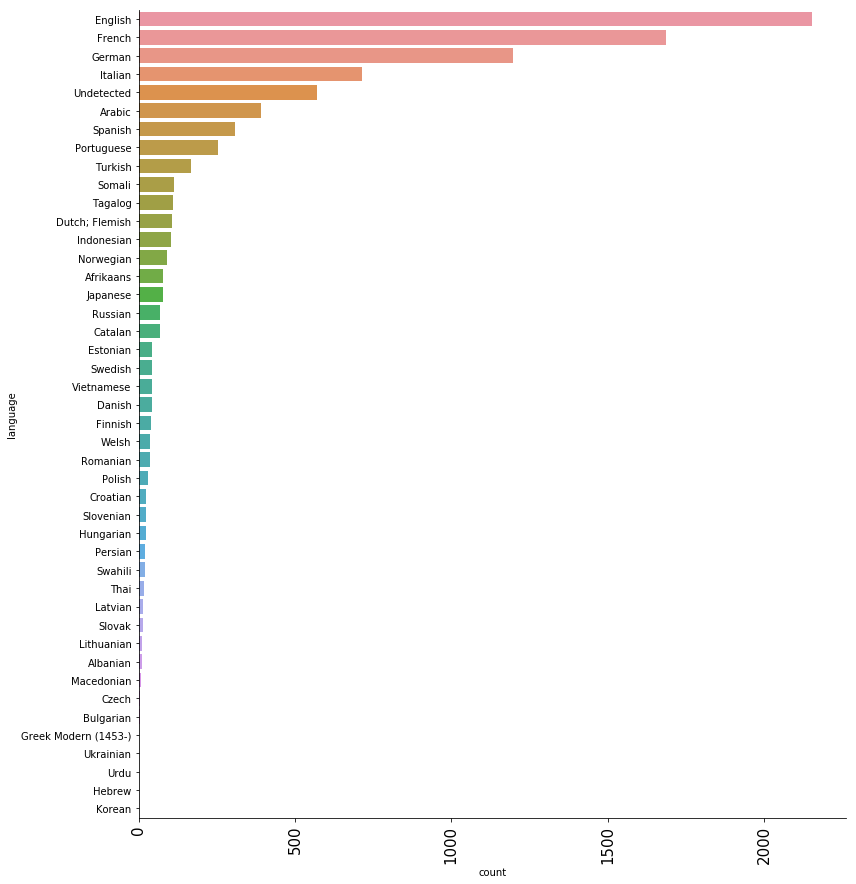

In [13]:
ax = sns.factorplot(size=12,kind = 'bar', y="language", x="count", data=counts, orient='h')
plt.xticks(rotation=90,fontsize=15)
plt.show(ax)

In [17]:
22222184.0/8790.0

2528.1210466439134

In [ ]:
#pd.set_option("display.max_rows",500)
#tdata.loc[tdata.language==""].text_stripped[0:500]